#### Student Performance Indicator by Krish Naik. I made some changes to the code e.g adding class and def functions


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import logging
import warnings
warnings.filterwarnings('ignore')

In [22]:
class Dataloader:
    """
    A class for retrieving data from a designated
    source and outputting a DataFrame format.
    """
    
    def __init__(self, data_path):
        self.data_path = data_path
        
    def get_data(self):
        try:
            logging.info(print("Loading data from the source: {}".format(self.data_path)))
            return pd.read_csv(self.data_path)
        except Exception as e:
            logging.error(e)
            raise e

In [179]:
df=Dataloader("./stud.csv").get_data()

Loading data from the source: ./stud.csv


#### Import the CSV Data as Pandas DataFrame

#### Show Top 5 Records

In [149]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform
- Shape of the dataset
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [150]:
def data_info(df: pd.DataFrame) -> None:
    """
    Prints out basic information about the dataframe.

    Parameters:
    df (pandas.DataFrame): The dataframe to be checked.

    Returns:
    None
    """

    print("Shape of DataFrame:")
    print(df.shape)
    print("--------------------")

    print("Missing Values:")
    print(df.isnull().sum())
    print("--------------------")

    print("Duplicates:")
    print(df.duplicated().sum())
    print("--------------------")

    print("DataFrame Info:")
    print(df.info())
    print("--------------------")

    print("Number of unique values in each column:")
    print(df.nunique())
    print("--------------------")

    print("Descriptive Statistics:")
    print(df.describe())
    print("--------------------")

In [151]:
data_info(df)

Shape of DataFrame:
(1000, 10)
--------------------
Missing Values:
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total score                    0
average                        0
dtype: int64
--------------------
Duplicates:
0
--------------------
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   

#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [152]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [153]:
def print_categories(df):
    print("Categories in 'gender' variable:     ",end=" " )
    print(df['gender'].unique())
    print("-"*15)

    print("Categories in 'race_ethnicity' variable:  ",end=" ")
    print(df['race_ethnicity'].unique())
    print("-"*15)

    print("Categories in'parental level of education' variable:",end=" " )
    print(df['parental_level_of_education'].unique())
    print("-"*15)

    print("Categories in 'lunch' variable:     ",end=" " )
    print(df['lunch'].unique())
    print("-"*15)

    print("Categories in 'test preparation course' variable:     ",end=" " )
    print(df['test_preparation_course'].unique())
    print("-"*15)

In [154]:
print_categories(df)

Categories in 'gender' variable:      ['female' 'male']
---------------
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
---------------
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
---------------
Categories in 'lunch' variable:      ['standard' 'free/reduced']
---------------
Categories in 'test preparation course' variable:      ['none' 'completed']
---------------


In [155]:
# define numerical & categorical columns
def separate_data(df):
  
  numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
  categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
  
  print('We have {} numerical features:'.format(len(numeric_features)))
  print(numeric_features)
  print("-"*15)
  print('We have {} categorical features:'.format(len(categorical_features)))
  print(categorical_features)
  
  return None
if __name__=="__main__":
  separate_data(df)

We have 5 numerical features:
['math_score', 'reading_score', 'writing_score', 'total score', 'average']
---------------
We have 5 categorical features:
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [156]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


### 3.8 Adding columns for "Total Score" and "Average"

In [182]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [158]:
def full_marks(df:pd.DataFrame):
    """ 
    This function takes in a dataframe as parameter and counts the number of students with full marks in Maths, Writing, and Reading.
    It then prints the results for each subject.
    """
    reading_full = df[df['reading_score'] == 100]['average'].count()
    writing_full = df[df['writing_score'] == 100]['average'].count()
    math_full = df[df['math_score'] == 100]['average'].count()

    print("Number of students with full marks in Maths: {}".format(math_full))
    print("Number of students with full marks in Writing: {}".format(writing_full))
    print("Number of students with full marks in Reading: {}".format(reading_full))
if __name__=="__main__":
  full_marks(df)

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [159]:
def less_than_20(df):
    """ 
    This function takes in a dataframe as parameter and counts the number of students with less than 20 marks in Maths, Writing, and Reading.
    It then prints the results for each subject.
    """
    reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
    writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
    math_less_20 = df[df['math_score'] <= 20]['average'].count()

    print("Number of students with less than 20 marks in Maths: {}".format(math_less_20))
    print("Number of students with less than 20 marks in Writing: {}".format(writing_less_20))
    print("Number of students with less than 20 marks in Reading: {}".format(reading_less_20))
less_than_20(df)

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

In [180]:
class ChartPlotter():
    """
     constructor that takes in dataframe and column name as arguments
    """
    def __init__(self, df, column):
        self.df = df
        self.column = column
        
    def plot_histogram(self):
        pass
    
    def plot_violin(self):
        pass
    
    
class AverageChart(ChartPlotter):
    
    """
    constructor to inherit from base class
    """
    def __init__(self, df, column):
        super().__init__(df, column)
        
    def plot_histogram(self):
        fig, axs = plt.subplots(1, 2, figsize=(15, 7))
        plt.subplot(121)
        sns.histplot(data=self.df, x='average', bins=30, kde=True, color='g')
        plt.subplot(122)
        sns.histplot(data=self.df, x='average', kde=True, hue=self.column)
        plt.show()
        

class TotalScoreChart(ChartPlotter):
    
    def __init__(self, df, column):
        super().__init__(df, column)
        
    
    def plot_histogram(self):
        fig, axs = plt.subplots(1, 2, figsize=(15, 7))
        
        plt.subplot(121)
        sns.histplot(data=self.df, x='total score', bins=30, kde=True, color='g')
        
        plt.subplot(122)
        sns.histplot(data=self.df, x='total score', kde=True, hue=self.column)
        
        plt.show()
        

class GenderPerformance(ChartPlotter):
    
    def __init__(self, df, column):
        super().__init__(df, column)
        
    def plot_histogram(self):
        plt.subplots(1, 3, figsize=(25, 6))
        plt.subplot(141)
        sns.histplot(data=self.df, x='average', kde=True, hue=self.column)
        
        plt.subplot(142)
        sns.histplot(data=self.df[self.df.gender == 'female'], x='average', kde=True, hue=self.column)
        
        plt.subplot(143)
        sns.histplot(data=self.df[self.df.gender == 'male'], x='average', kde=True, hue=self.column)
        
        plt.show()
        



class ScoreDistribution(ChartPlotter):

    def __init__(self, df, column:list):
        super().__init__(df, column)

    def plot_violin(self):
        plt.figure(figsize=(18, 8))

        scores = self.column
        for i in range(len(scores)):
            plt.subplot(1, 4, i+1)
            #plt.title(scores[i].upper() + ' SCORES')
            plt.title(' '.join(scores[i].upper().split('_')))
            sns.violinplot(y=self.df[scores[i]], color=['red', 'green', 'blue'][i], linewidth=3)

        plt.show() 


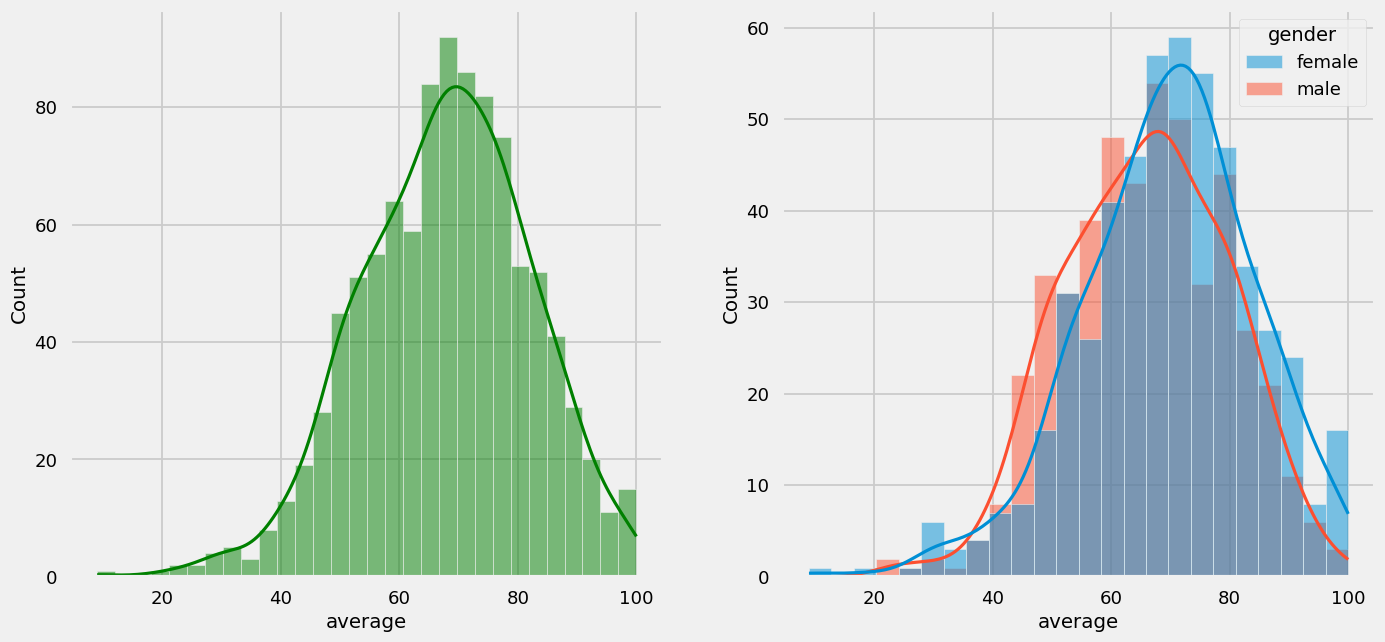

In [183]:
AverageChart(df,'gender').plot_histogram()

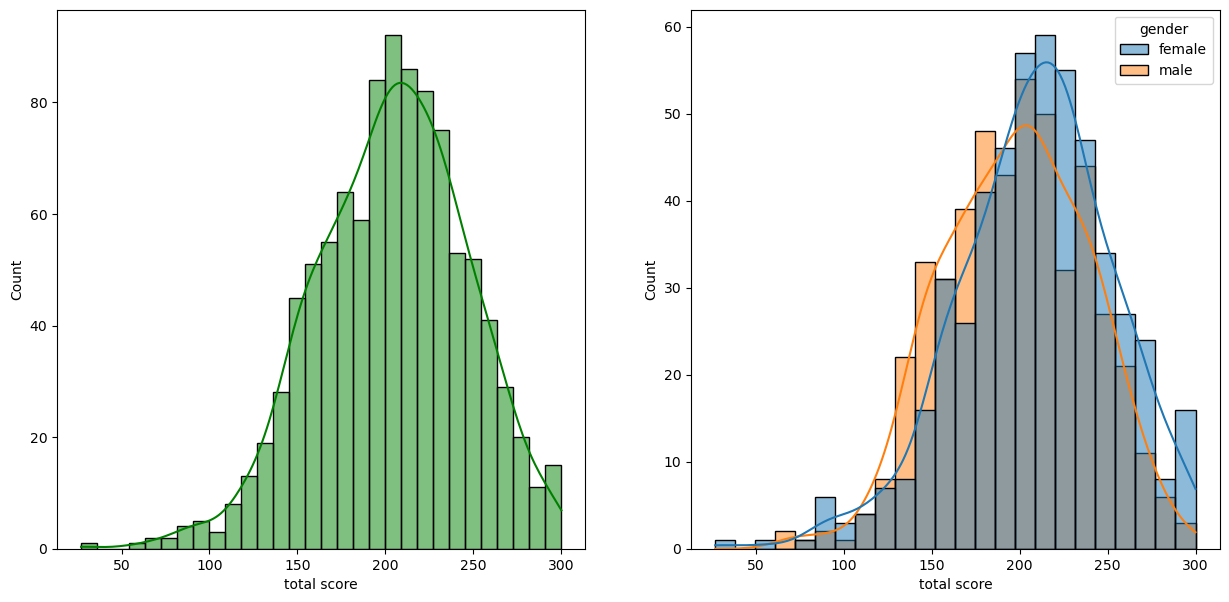

In [53]:
TotalScoreChart(df,'gender').plot_histogram()

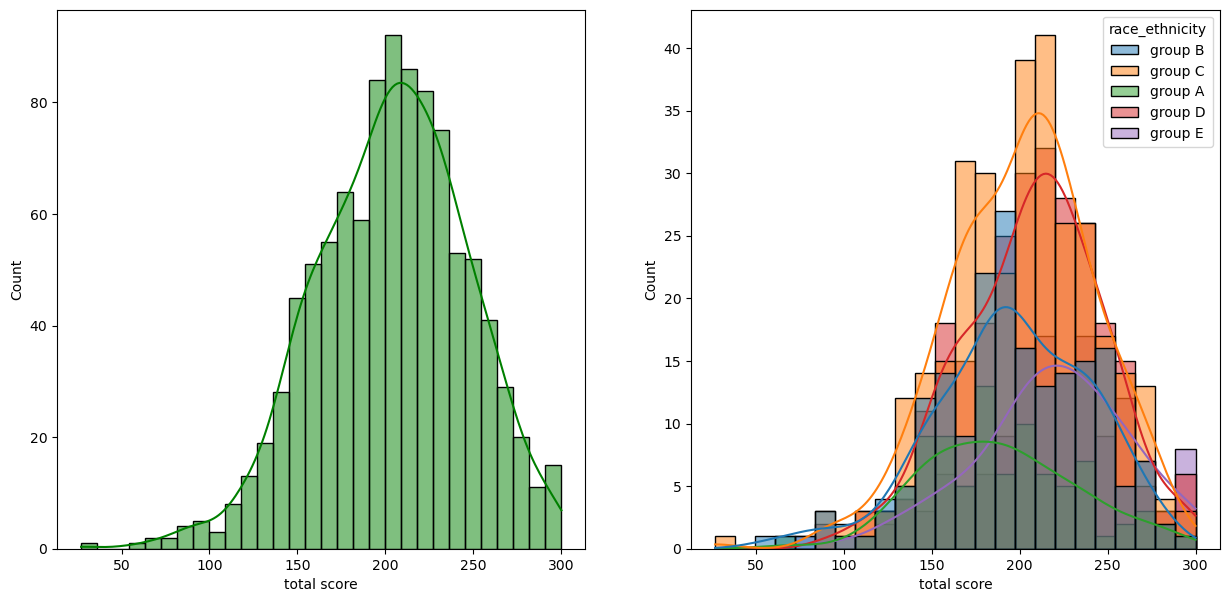

In [54]:
TotalScoreChart(df,'race_ethnicity').plot_histogram()

#####  Insights
- Female students tend to perform well then male students.

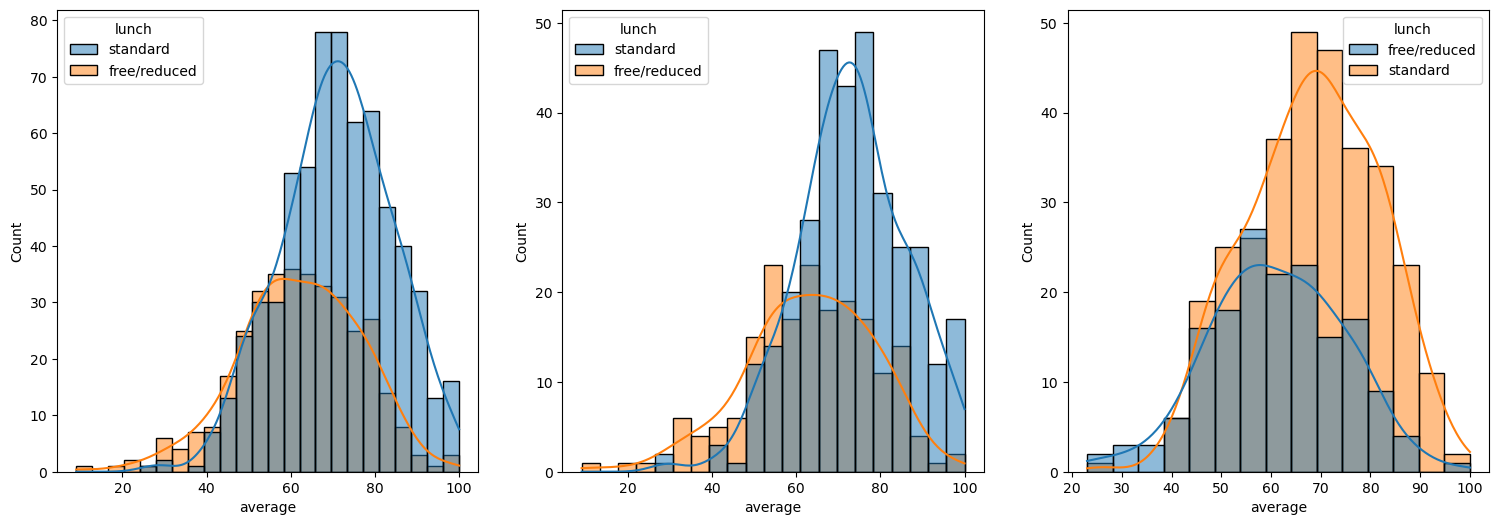

In [65]:
GenderPerformance(df,'lunch').plot_histogram()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

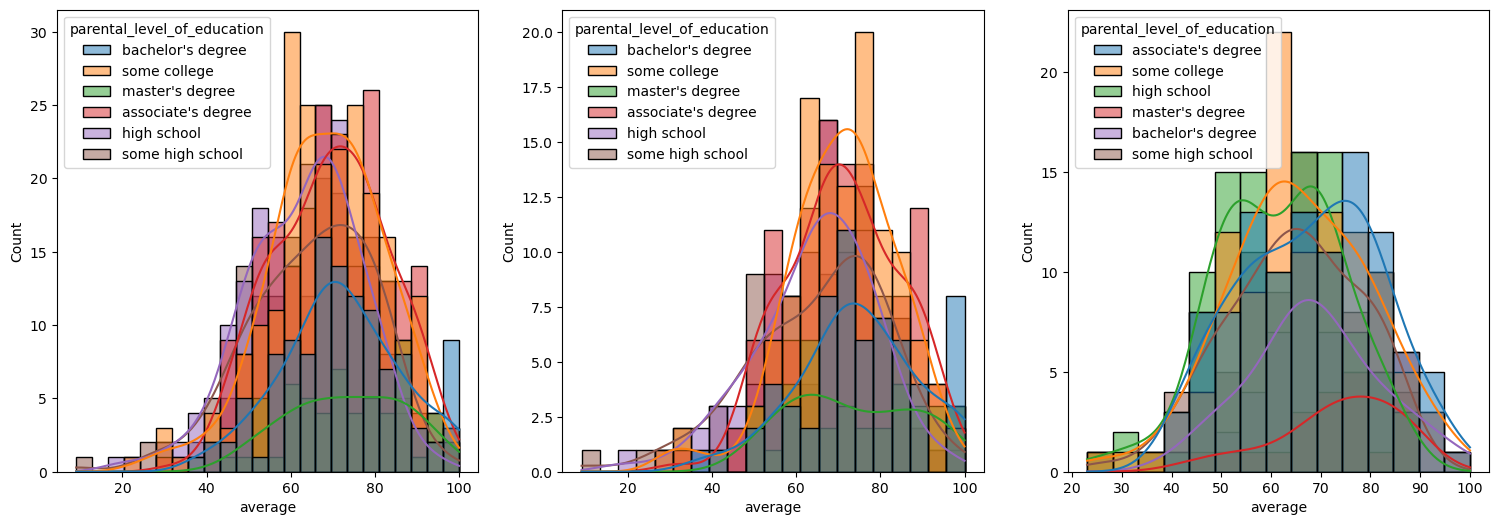

In [66]:
GenderPerformance(df,'parental_level_of_education').plot_histogram()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

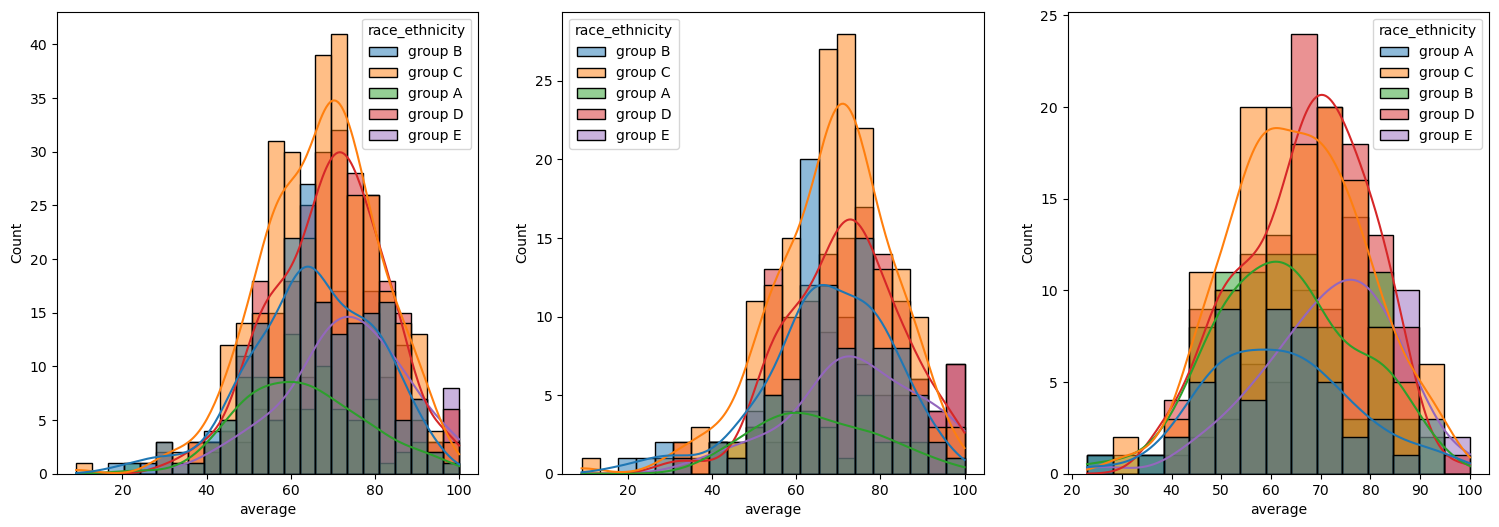

In [67]:
GenderPerformance(df,'race_ethnicity').plot_histogram()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

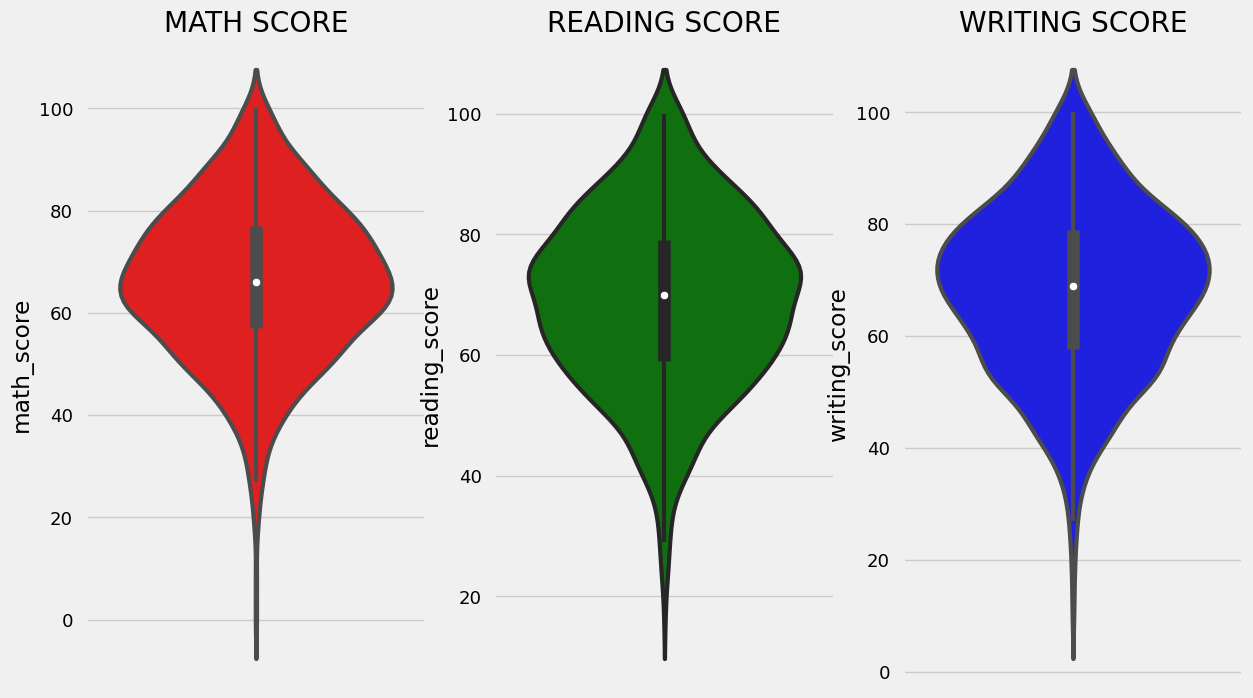

In [162]:
ScoreDistribution(df,['math_score', 'reading_score', 'writing_score']).plot_violin()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

In [163]:
class MultivariateAnalysis:

    def piechart(self, df):
        plt.rcParams['figure.figsize'] = (30, 12)

        categories = ['gender', 'race_ethnicity', 'lunch', 'test_preparation_course', 'parental_level_of_education']
        colors = [['red','green'], ['red', 'green', 'blue', 'cyan','orange'], ['red','green'], ['red','green'], ['red', 'green', 'blue', 'cyan','orange','grey']]

        for i, category in enumerate(categories):
            plt.subplot(1, 5, i + 1)
            size = df[category].value_counts()
            labels = size.index.values
            labels = [i.capitalize() for i in labels]
            color = colors[i]
            plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
            plt.title(' '.join(category.title().split('_')), fontsize=20)
            plt.axis('off')

        plt.tight_layout()
        plt.grid()
        plt.show()

    def pairplot(self, df):
        sns.pairplot(df, hue='gender')
        plt.show()

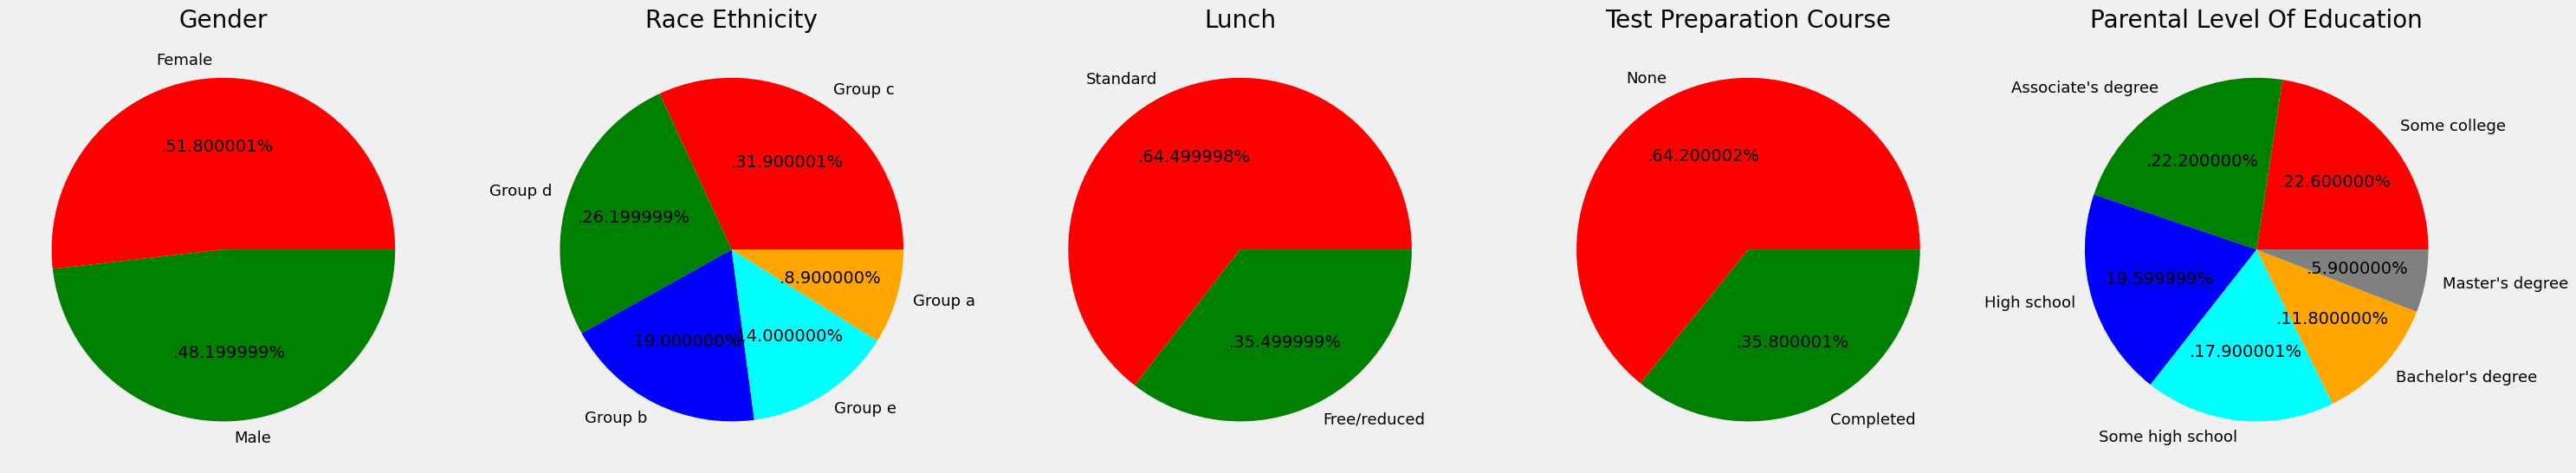

In [164]:
MultivariateAnalysis().piechart(df)

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

In [197]:
class UnivariateAnalysis:
    def __init__(self, df):
        self.df = df
    
    def gender_analysis(self):
        fig, ax = plt.subplots(1, 2, figsize=(20,10))
        sns.countplot(x=self.df['gender'], data=self.df, palette='bright', ax=ax[0], saturation=0.95)
        for container in ax[0].containers:
            ax[0].bar_label(container, color='black', size=20)
        
        plt.pie(x=self.df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
        plt.show()
    
    def race_ethnicity_analysis(self):
        fig, ax = plt.subplots(1, 2, figsize=(20,10))
        sns.countplot(x=self.df['race_ethnicity'], data=self.df, palette='bright', ax=ax[0], saturation=0.95)
        for container in ax[0].containers:
            ax[0].bar_label(container, color='black', size=20)
        
        plt.pie(x=self.df['race_ethnicity'].value_counts(), labels=self.df['race_ethnicity'].value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True)
        plt.show()
    
    def parental_education_analysis(self):
        plt.rcParams['figure.figsize'] = (15, 9)
        plt.style.use('fivethirtyeight')
        sns.countplot(self.df['parental_level_of_education'].value_counts(), palette='Blues')
        plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
        plt.xlabel('Degree')
        plt.ylabel('count')
        plt.show()
    
    def lunch_analysis(self):
        self.df['lunch'].value_counts().plot(kind='bar')
        plt.title('Comparison of different types of lunch')
        plt.xlabel('types of lunch')
        plt.ylabel('count')
        plt.show()

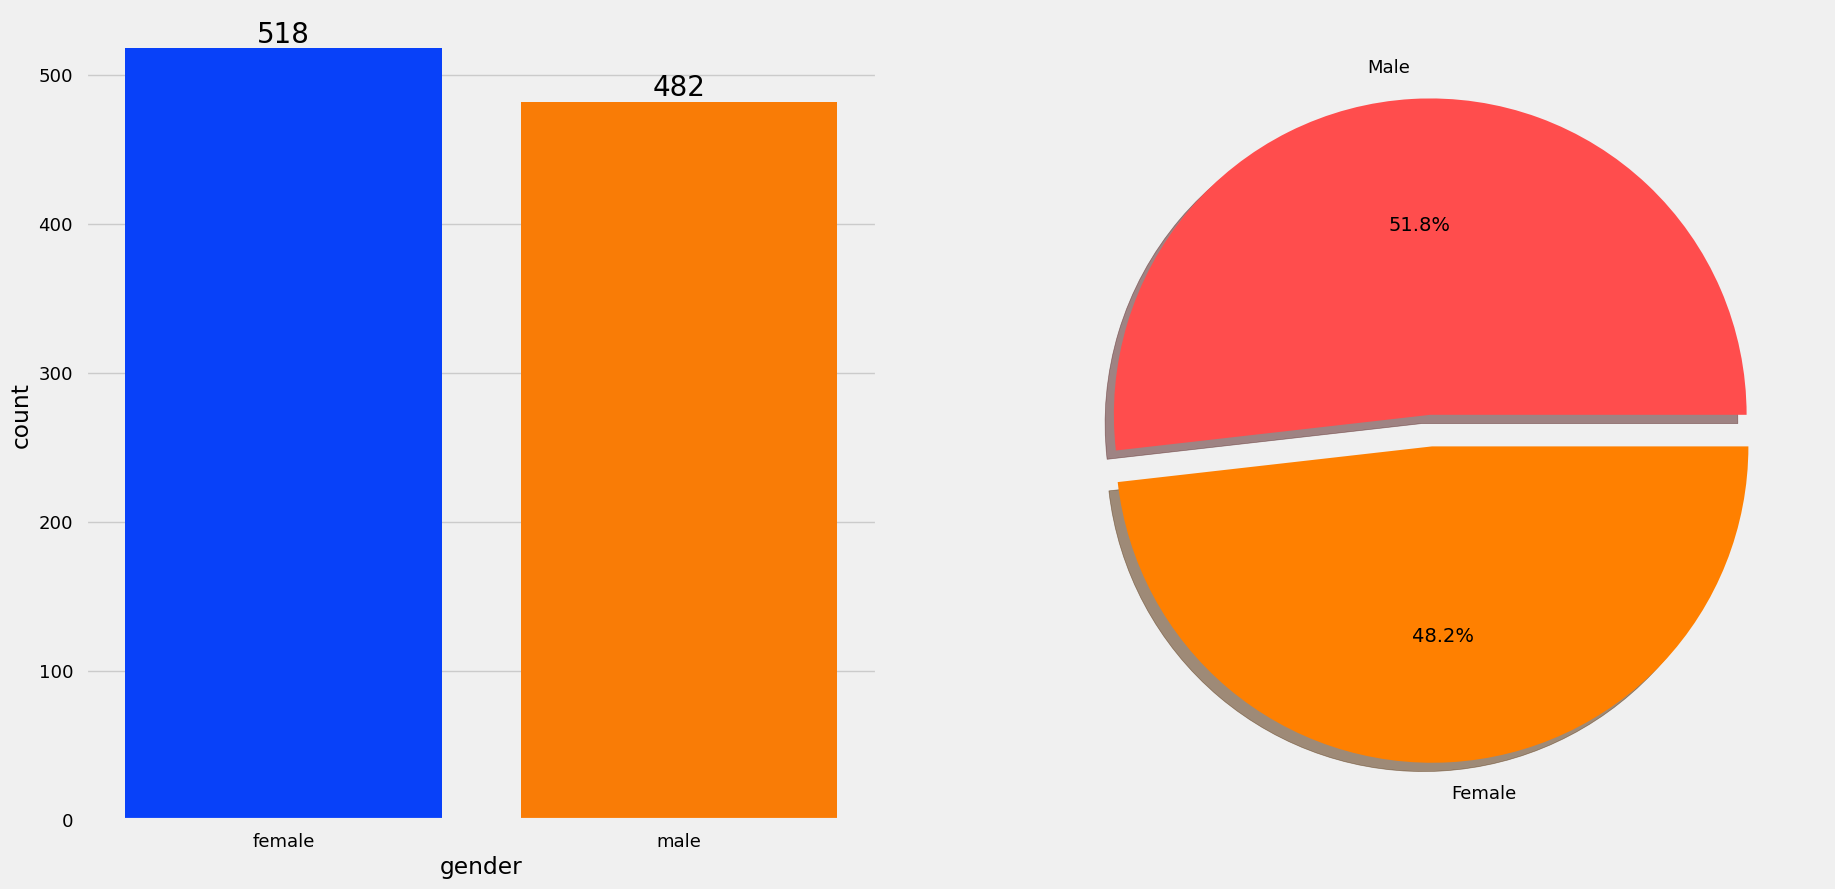

In [198]:
UnivariateAnalysis(df).gender_analysis()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [166]:
gender_group = df.groupby('gender')['average'].mean()
gender_group

gender
female    69.569498
male      65.837483
Name: average, dtype: float64

In [167]:
gender_groupm = df.groupby('gender')['math_score'].mean()
gender_groupm

gender
female    63.633205
male      68.728216
Name: math_score, dtype: float64

In [202]:
class BivariateAnalysis:

    def __init__(self, data):
        self.data = data

    
    def gender_score_comparison(self):
        
        plt.figure(figsize=(10, 8))
        X = ['Total Average','Math Average']
        gender_group = self.data.groupby('gender')['average'].mean()
        gender_groupm = self.data.groupby('gender')['math_score'].mean()
        female_scores = [gender_group[0], gender_groupm[0]]
        male_scores = [gender_group[1], gender_groupm[1]]
        X_axis = np.arange(len(X))
        plt.bar(X_axis-0.2, male_scores, 0.4, label='Male')
        plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')
        plt.xticks(X_axis, X)
        plt.ylabel("Marks")
        plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
        plt.legend()
        plt.show()


    def race_ethnicity_score_comparison(self):
        
        Group_data2 = self.data.groupby('race_ethnicity')
        f, ax = plt.subplots(1,3,figsize=(20, 8))
        sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
        ax[0].set_title('Math score', color='#005ce6', size=20)
        for container in ax[0].containers:
            ax[0].bar_label(container,color='black',size=15)

        sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
        ax[1].set_title('Reading_score', color='#005ce6', size=20)
        for container in ax[1].containers:
            ax[1].bar_label(container,color='black',size=15)

        sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
        ax[2].set_title('Writing score',color='#005ce6',size=20)
        for container in ax[2].containers:
            ax[2].bar_label(container,color='black',size=15)


    def parental_level_of_education(self):
        
        df.groupby('parental_level_of_education')['average'].agg('mean').plot(kind='barh', figsize=(10, 10))
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()


    def parent_level_edu_with_course(self):
        
        f, ax = plt.subplots(1, 2, figsize=(20, 8))
        sns.countplot(x=self.data['parental_level_of_education'], data=self.data, palette='bright', hue='test_preparation_course', saturation=0.95, ax=ax[0])
        ax[0].set_title('Students vs test preparation course ', color='black', size=25)
        for container in ax[0].containers:
            ax[0].bar_label(container, color='black', size=20)
            
        sns.countplot(x=self.data['parental_level_of_education'], data=self.data, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])
        for container in ax[1].containers:
            ax[1].bar_label(container, color='black', size=20)
            

    def lunch_vs_test_scores(self):
        
        plt.figure(figsize=(12,6))
        plt.subplot(2,2,1)
        sns.barplot (x=self.data['lunch'], y=self.data['math_score'], hue=self.data['test_preparation_course'])
        plt.subplot(2,2,2)
        sns.barplot (x=self.data['lunch'], y=self.data['reading_score'], hue=self.data['test_preparation_course'])
        plt.subplot(2,2,3)
        sns.barplot (x=self.data['lunch'], y=self.data['writing_score'], hue=self.data['test_preparation_course'])
        plt.show()

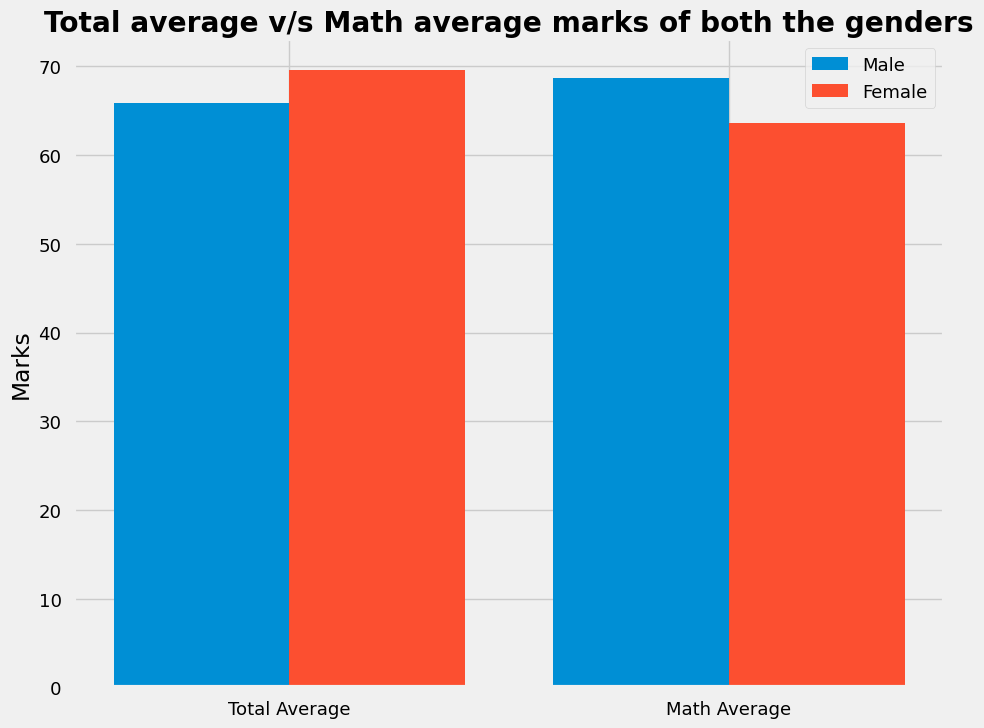

In [203]:
BivariateAnalysis(df).gender_score_comparison()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

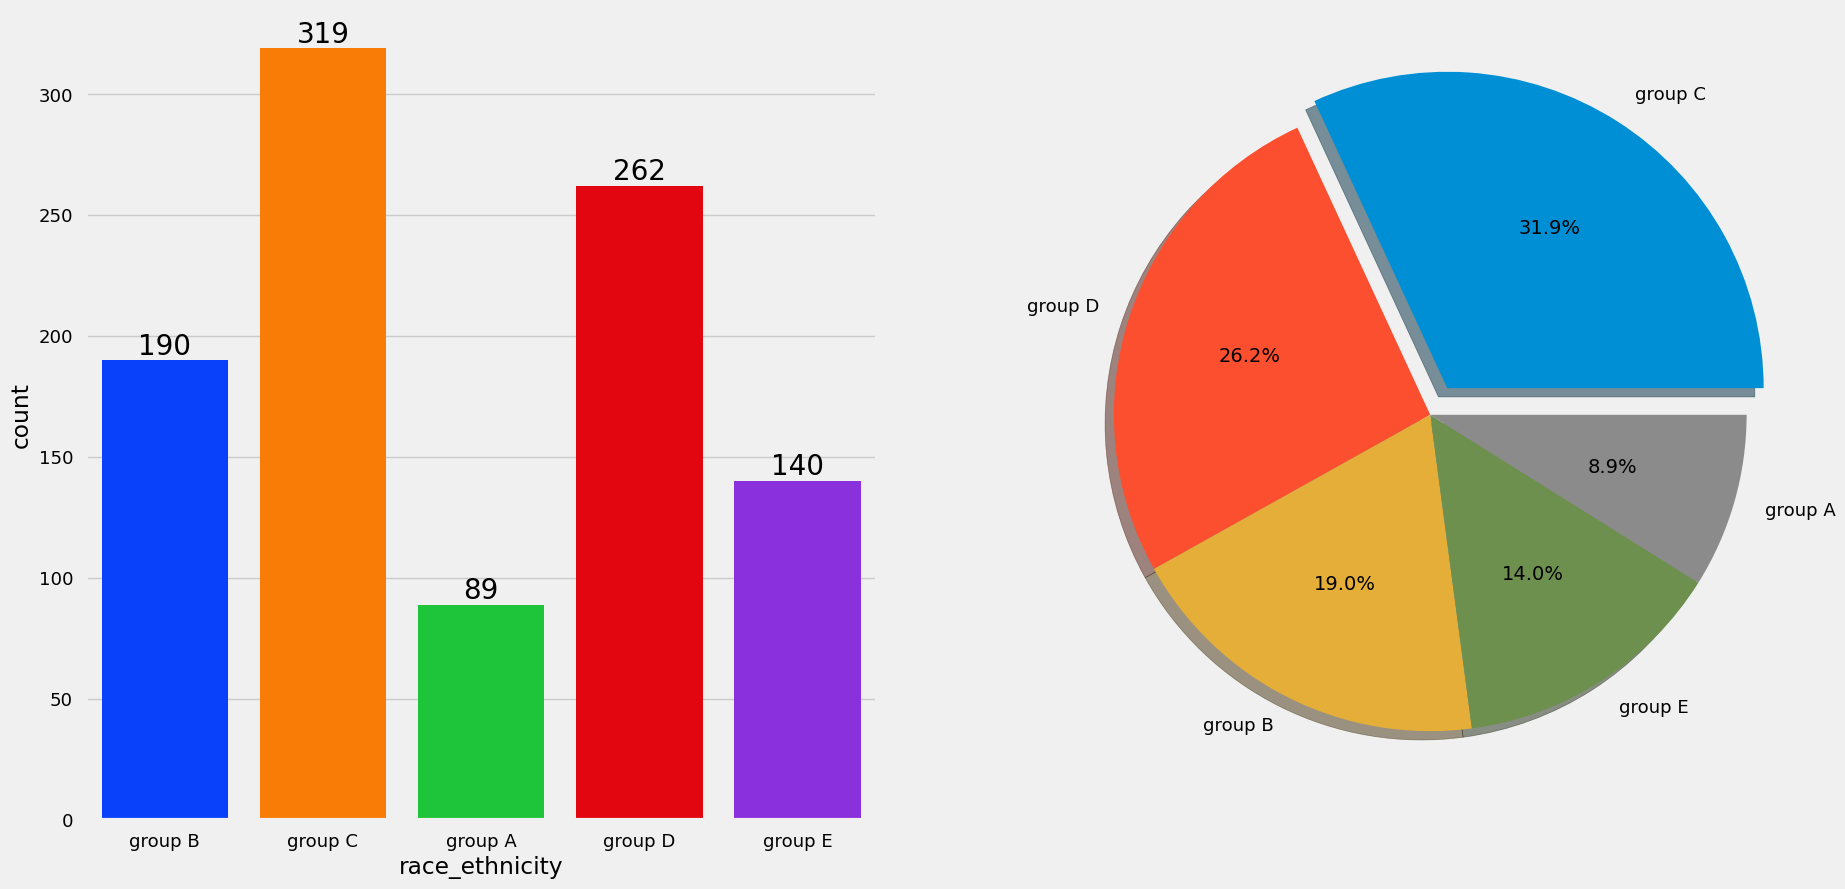

In [199]:
UnivariateAnalysis(df).race_ethnicity_analysis()

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

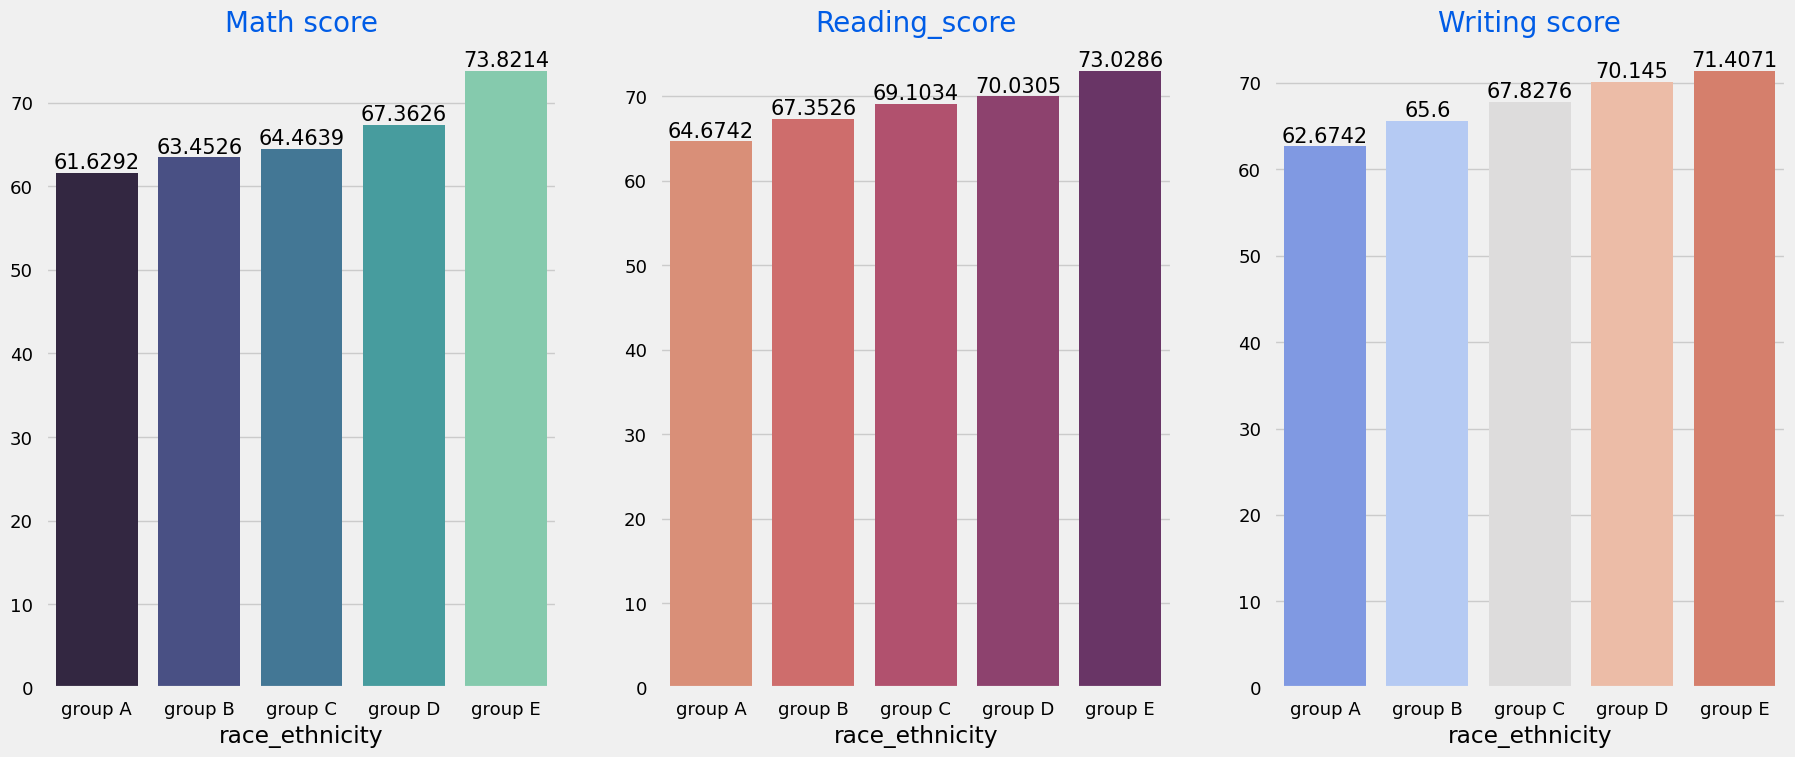

In [204]:
BivariateAnalysis(df).race_ethnicity_score_comparison()

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

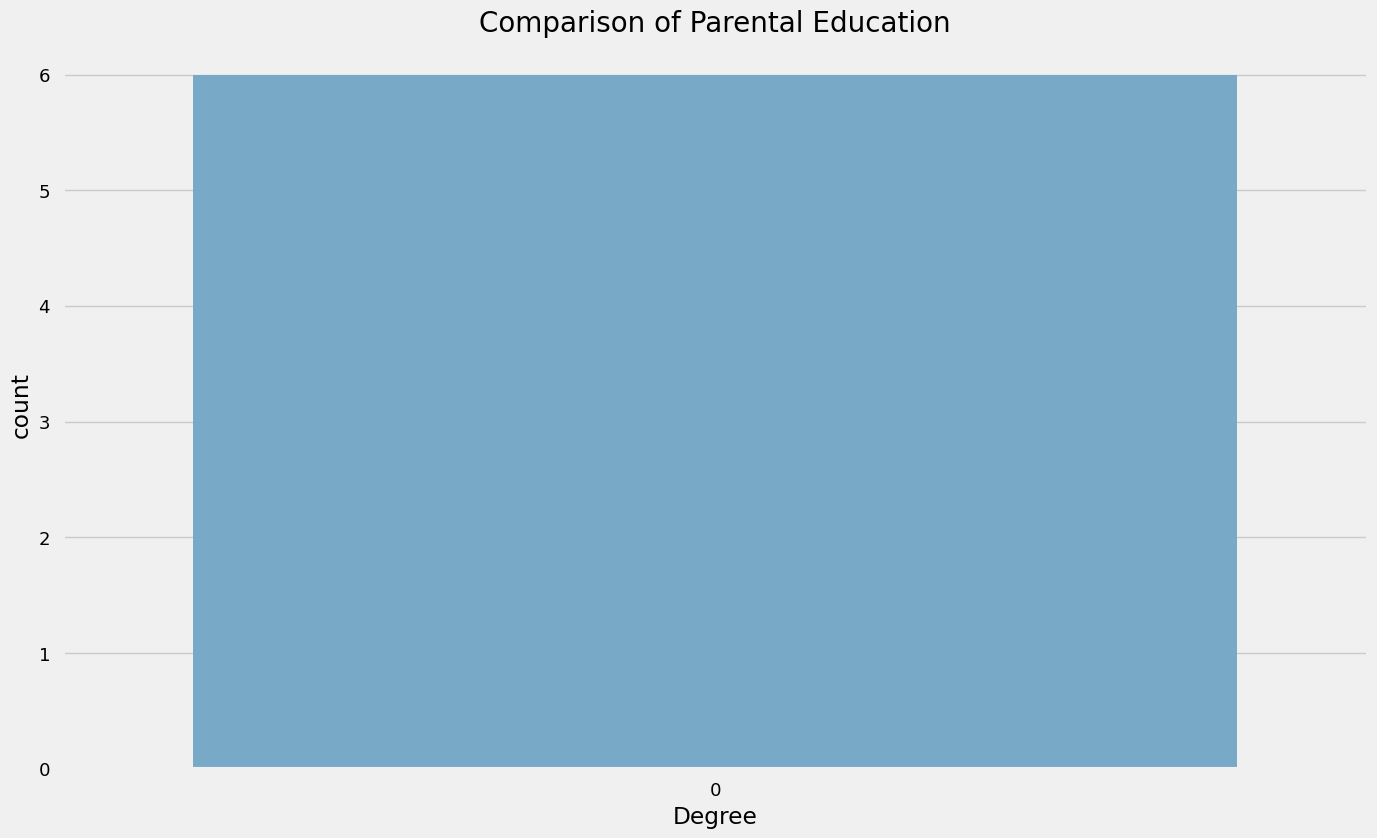

In [200]:
UnivariateAnalysis(df).parental_education_analysis()

In [174]:
df['parental_level_of_education_mapping'].value_counts()

parental_level_of_education_mapping
4    226
3    222
2    196
1    179
5    118
6     59
Name: count, dtype: int64

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

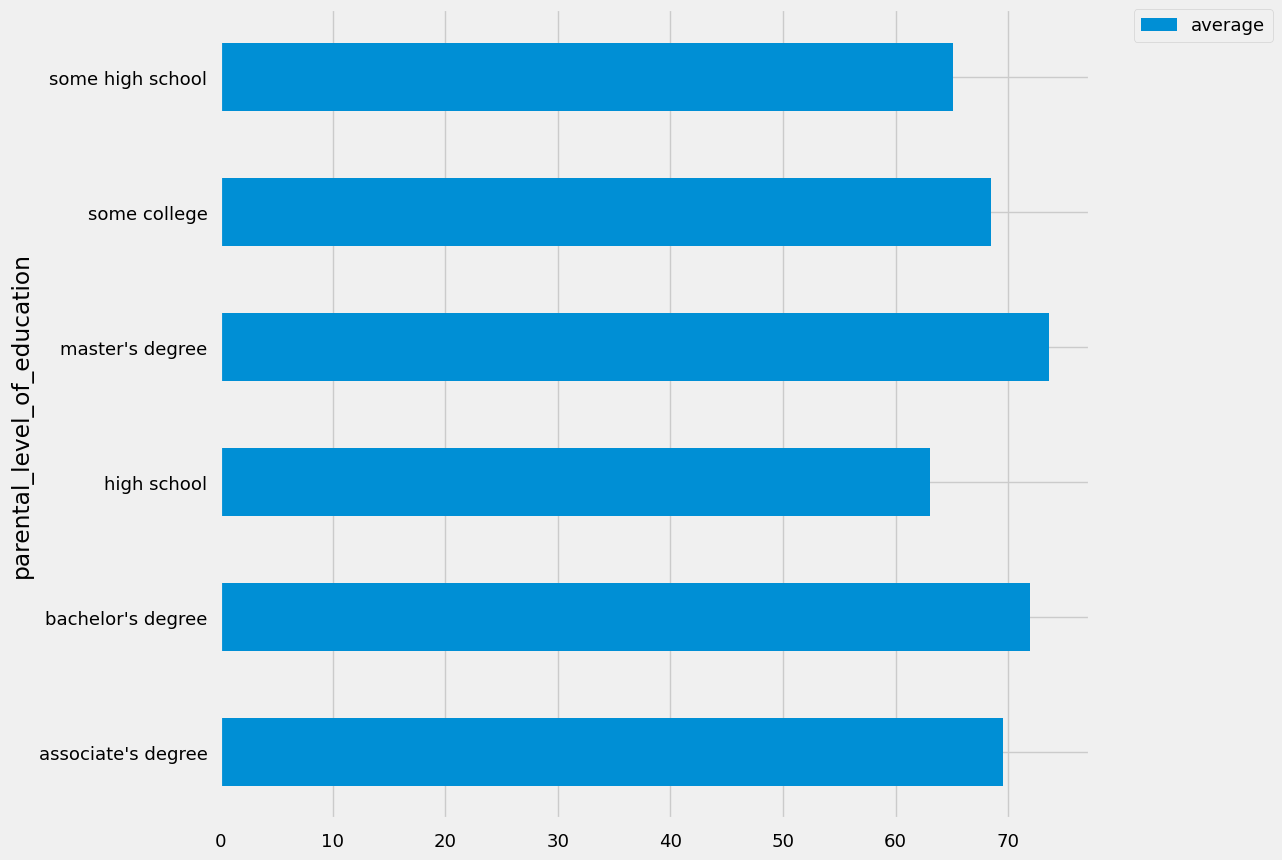

In [206]:
BivariateAnalysis(df).parental_level_of_education()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

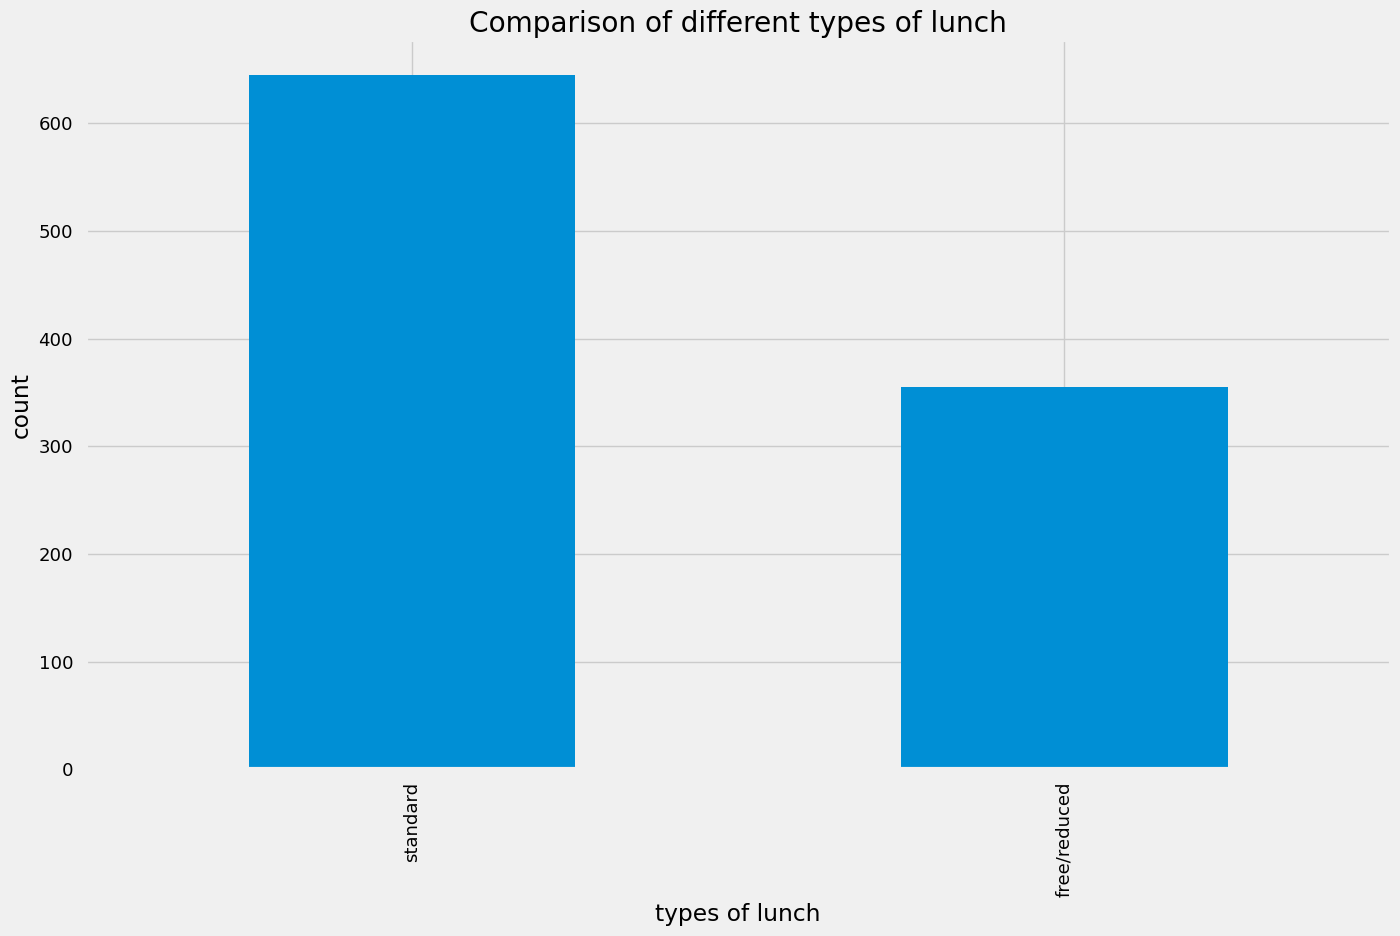

In [201]:
UnivariateAnalysis(df).lunch_analysis()

In [187]:
#plt.rcParams['figure.figsize'] = (15, 9)
#plt.style.use('seaborn-talk')
#sns.countplot(df['lunch'].value_counts(), palette = 'PuBu')
#plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
#plt.xlabel('types of lunch')
#plt.ylabel('count')
#plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

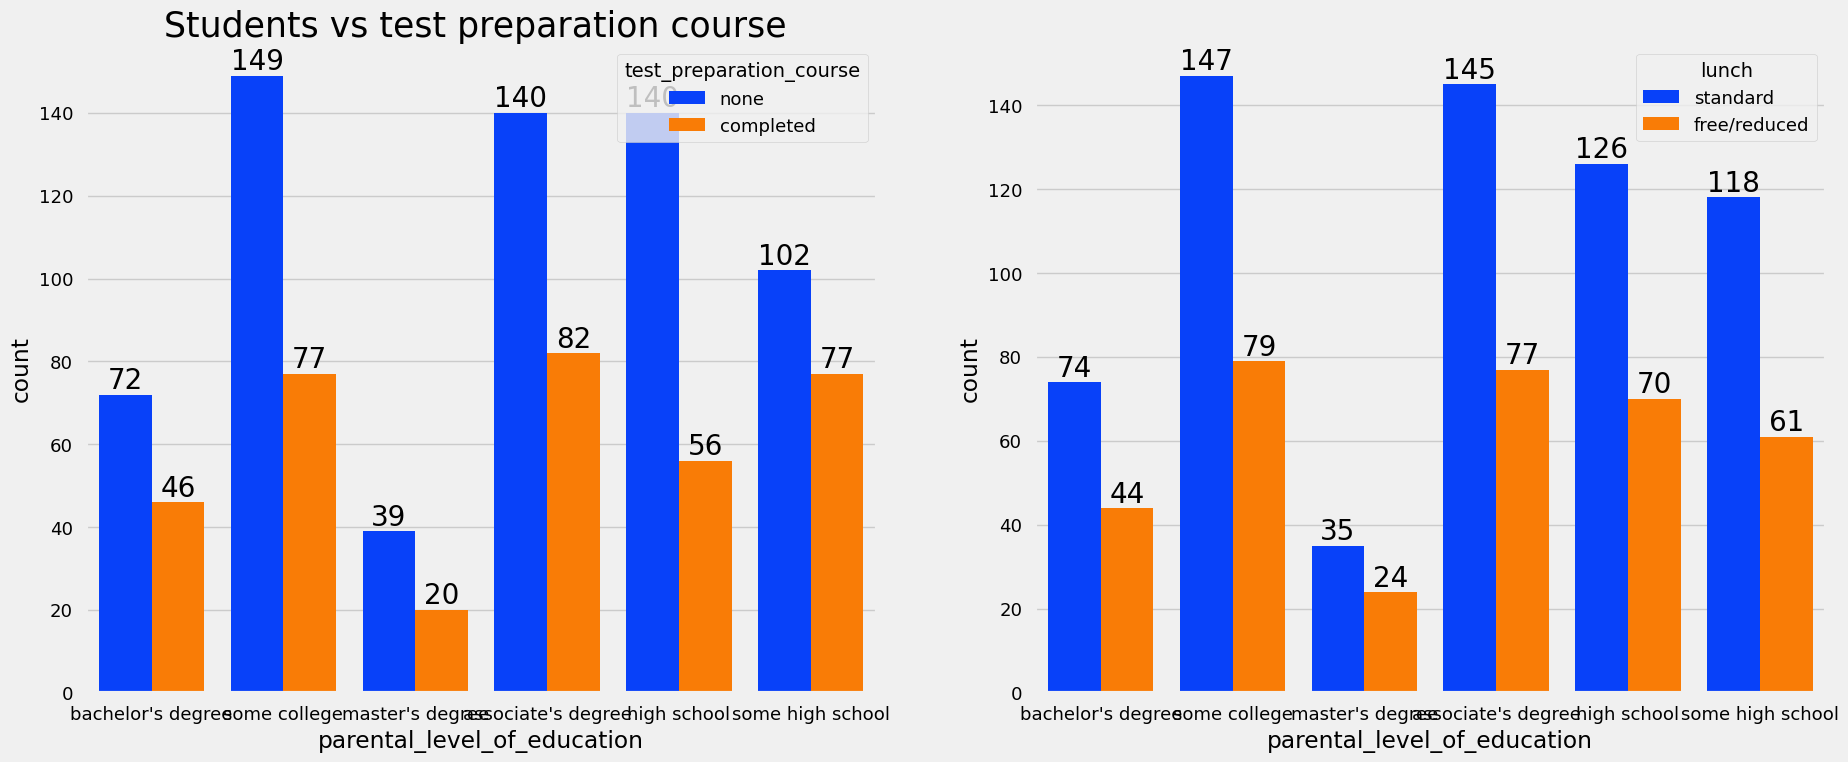

In [207]:
BivariateAnalysis(df).parent_level_edu_with_course()

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

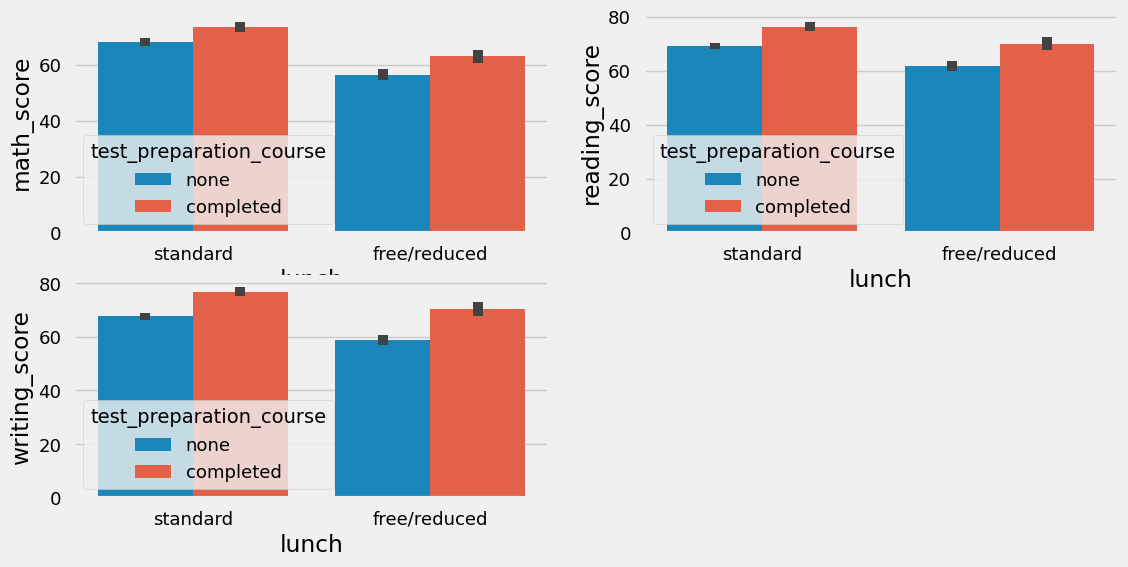

In [208]:
BivariateAnalysis(df).lunch_vs_test_scores()

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

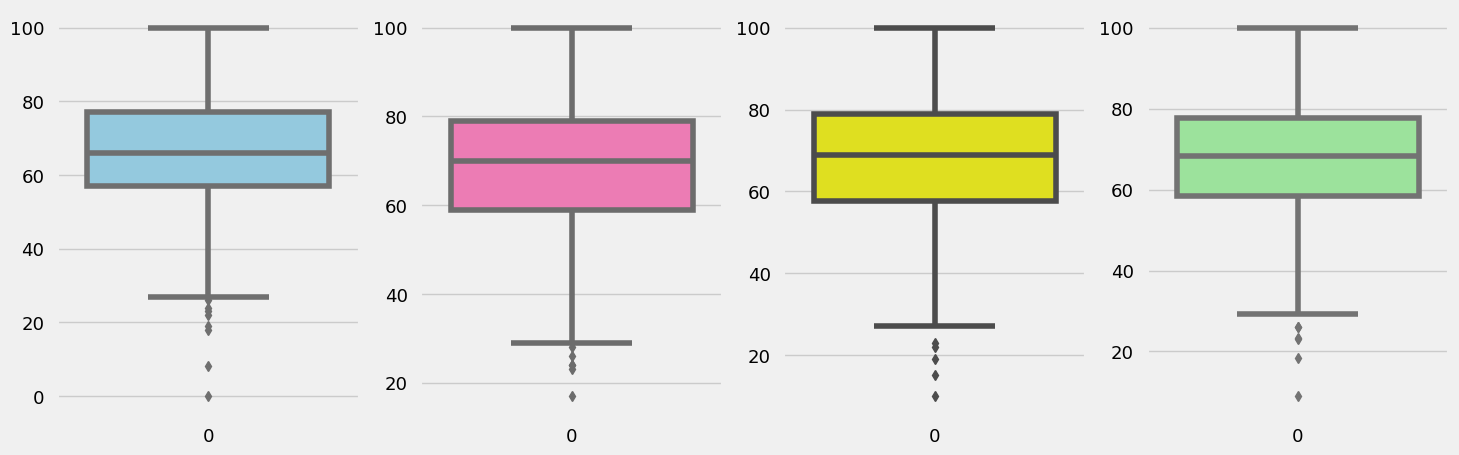

In [212]:
def check_outlier_boxplot(dataframe: pd.DataFrame):
    """
    This function creates a boxplot for each subject and average score in 
    a given dataframe and displays them in a figure with 4 subplots.
    
    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the data to be plotted.
    
    Returns:
    None
    """
    
    fig, ax = plt.subplots(1, 4, figsize=(16, 5))
    
    sns.boxplot(dataframe['math_score'], color='skyblue', ax=ax[0])
    sns.boxplot(dataframe['reading_score'], color='hotpink', ax=ax[1])
    sns.boxplot(dataframe['writing_score'], color='yellow', ax=ax[2])
    sns.boxplot(dataframe['average'], color='lightgreen', ax=ax[3])
    plt.show()
    
check_outlier_boxplot(df)

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

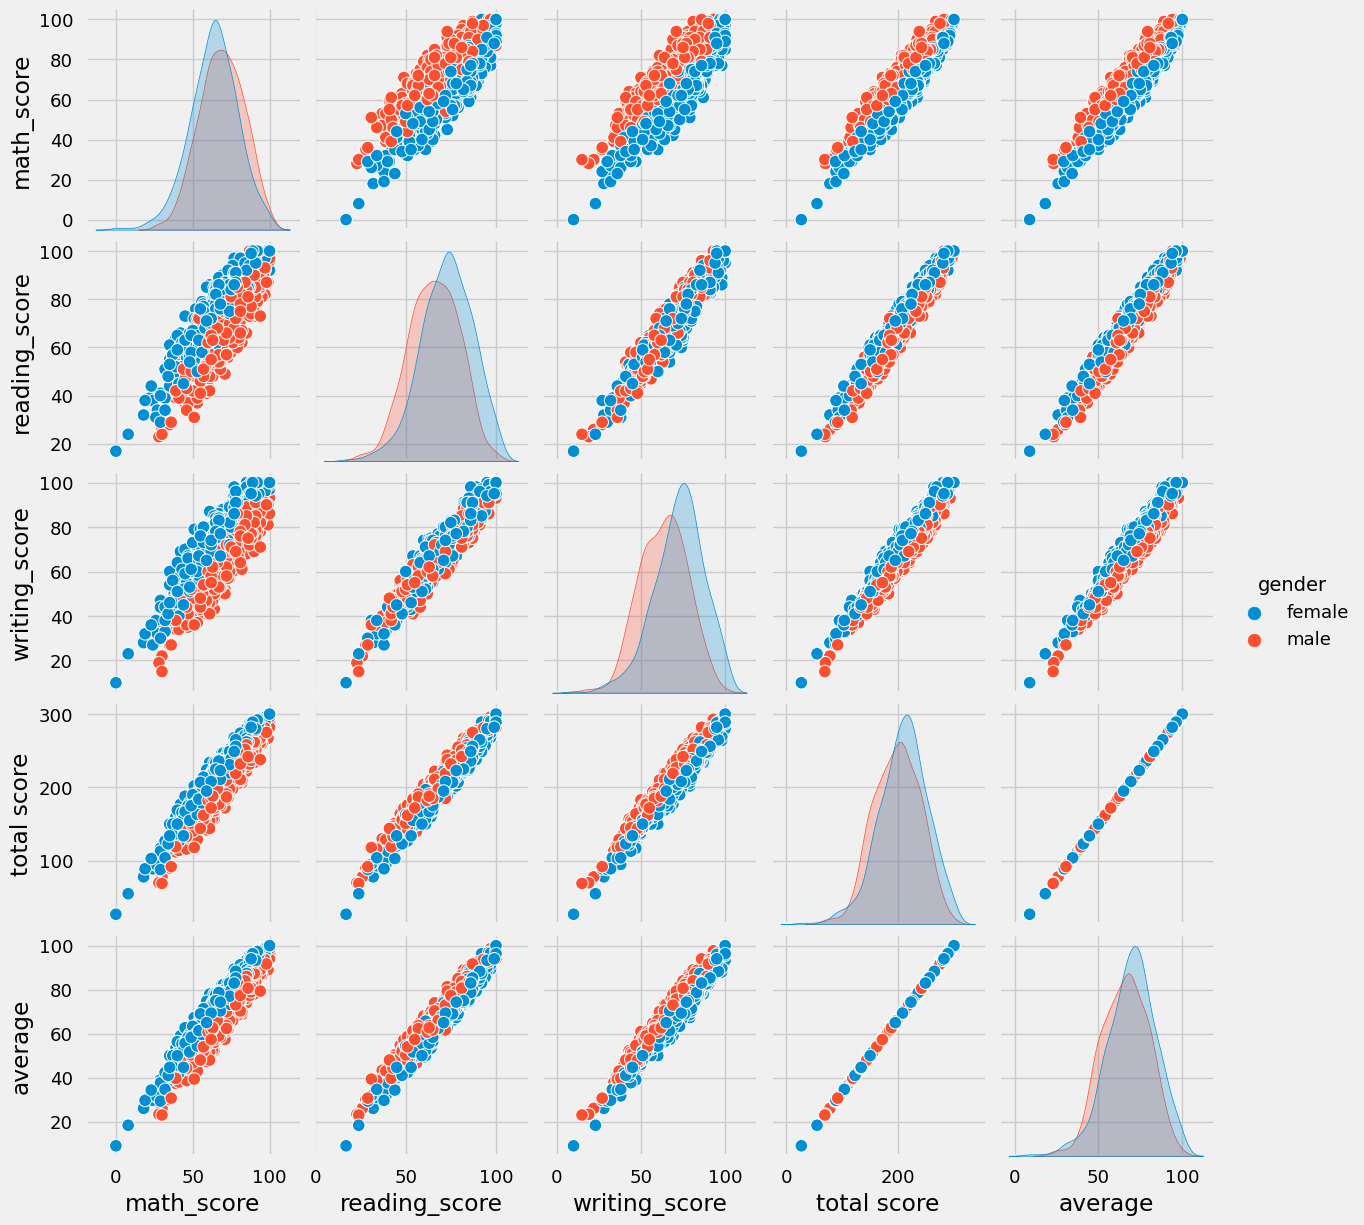

In [191]:
MultivariateAnalysis().pairplot(df)

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.